<a href="https://colab.research.google.com/github/Chetan-Chinchulkar/Age_Calculator/blob/main/200121012_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2



> **Name** : Chetan Chinchlukar

> **Roll No.** : 200121012

The total effort in naive Gauss elimination can be represented as

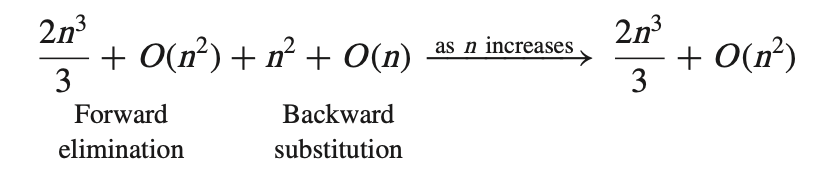











Conclusions of this efforts



1.   As the system gets larger, the computation time increases greatly. As in Table 9.1, the amount of flops increases nearly three orders of magnitude for every order of magnitude increase in the dimension.
2. Most of the effort is incurred in the elimination step. Thus, efforts to make the method more efficient should probably focus on this step.



# Limitations of Naive-Gauss Elimination



1.   **Division by Zero**


*   The primary reason that the foregoing technique is called “naive” is that during both the elimination and the back-substitution phases, it is possible that a division by zero can occur. 


2.   **Round-Off Errors**

*   The problem of round-off error can become particularly important when large num- bers of equations are to be solved. This is due to the fact that every result is dependent on previous results. Consequently, an error in the early steps will tend to propagate—that is, it will cause errors in subsequent steps.


3.   **Ill-Conditioned Systems**


*   Ill-conditioned systems are those where small changes in coefficients result in large changes in the solution. An alternative interpretation of ill-conditioning is that a wide range of answers can approximately satisfy the equations.
*   Because round-off errors can induce small changes in the coefficients, these artificial changes can lead to large solution errors for ill-conditioned systems





# Mitigations for these limitations




1.   **Using Pivoting**


*   Problems also can arise when a coefficient is very close to zero.
*   The primary reason that the foregoing technique is called “naive” is that during both the elimination and the back-substitution phases, it is possible that a division by zero can occur. 
*   The rows can then be switched so that the largest element is the pivot element. This is called partial pivoting.
*   If columns as well as rows are searched for the largest element and then switched, the procedure is called complete pivoting.




2.   **Use of More Significant Figures**


*   The simplest remedy for ill-conditioning is to use more significant figures in the computa- tion. If your application can be extended to handle larger word size, such a feature will greatly reduce the problem








# Code for Gauss elimination using Partial Pivoting

**Psedo Code**


**Back Substitution**



```
DOFOR k = 1, n - 1
  #Partial Pivoting
  if (A[k, k]) < 1.0e-12:
    DOFOR  i = k+1,n 
      if (A[i, k]) > (A[k, k]) :   
         for j in range(k, n):
            A[k, j],A[i,j] = A[i, i],A[k, i]    
          B[k],B[i] = B[i],B[k]
          break
  DOFOR i = k + 1, n
    factor = a[i,k] / a[k,k]
    DOFOR j = k + 1 to n
      a[i,j] = a[i,j] - factor * a[k,j]
    END DO
    b[i] =b[i] -factor/b[k]
  END DO
END DO
```

**Forward Substitution**



```
x[n] = b[n] / a[n,n]
DOFOR i = n - 1 , 1 , -1
  sum = b[i]
  DOFOR j= i+1,n
    sum = sum - a[i,j]*x[j]
  END DO
  x[i] = sum / a[i][i]
END DO
``` 




**Python Code**

In [1]:
import numpy as np

def forward_elimination(A, B, X, n):
    for k in range( n - 1):
        #Partial Pivoting
        if np.fabs(A[k, k]) < 1.0e-12:
            for i in range(k+1,n):
                if np.fabs(A[i, k]) > np. fabs(A[k, k]) :   # checking if the pivot coefficient is max or not
                    # swap the rows if the pivot coefficient is smaller
                    for j in range(k, n):
                        A[k, j],A[i,j] = A[i, i],A[k, i]    
                    B[k],B[i] = B[i],B[k]
                    break
        for i in range(k+1, n ):
            factor = A[i, k] / A[k, k]
            for j in range(k, n):
                A[i, j] = A[i, j] - factor * A[k, j]
            B[i] = B[i] - factor * B[k]
    

def back_substitution(A, B, X, n):
    X[n - 1] = B[n - 1] / A[n - 1, n - 1]
    for i in range(n - 2, -1, -1):
        sum = B[i]
        for j in range(i+1, n ):
            sum = sum - A[i, j] * X[j]
        X[i] = sum / A[i, i]

# AX = B

A = np.zeros((3,3), dtype=np.float64)
B = np.zeros((3,1), dtype=np.float64)

A = np.array([[3.0, -0.1, -0.2],
              [0.1,  7.0, -0.3],
              [0.3, -0.2, 10.0]])

B = np.array([7.85, -19.3, 71.4])

n = len(B)

X = np.zeros((n,1), dtype=np.float64)

print("Matrix A : \n" ,A, end='\n')
print("Matrix B : \n" ,B, end='\n')


#Applying the algorithms

forward_elimination(A, B, X, n)
back_substitution(A, B, X, n)

#Printing the output
print("Solution is:")
print(X)

Matrix A : 
 [[ 3.  -0.1 -0.2]
 [ 0.1  7.  -0.3]
 [ 0.3 -0.2 10. ]]
Matrix B : 
 [  7.85 -19.3   71.4 ]
Solution is:
[[ 3. ]
 [-2.5]
 [ 7. ]]
